# Description:
    Amazon is an online shopping website that now caters to millions of people everywhere. Over 34,000 consumer reviews for Amazon brand products like Kindle, Fire TV Stick and more are provided. 
The dataset has attributes like brand, categories, primary categories, reviews.title, reviews.text, and the sentiment. Sentiment is a categorical variable with three levels "Positive", "Negative“, and "Neutral". For a given unseen data, the sentiment needs to be predicted.
You are required to predict Sentiment or Satisfaction of a purchase based on multiple features and review text.

In [1]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import re
from nltk import word_tokenize
from nltk.tokenize import WordPunctTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
# import string
import warnings
# ! pip install wordcloud
#from wordcloud import WordCloud

from sklearn.preprocessing import LabelEncoder,LabelBinarizer

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report,precision_score, recall_score,roc_curve, roc_auc_score, auc

import tensorflow as tf
from tensorflow import keras
from sklearn.utils import class_weight
from sklearn.preprocessing import label_binarize
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D,Dropout,GRU
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.preprocessing import MinMaxScaler
from wordcloud import WordCloud

In [2]:
#load the train data
train_data = pd.read_csv('./Ecommerce/train_data.csv')
test_data = pd.read_csv('./Ecommerce/test_data.csv')
test_val_data = pd.read_csv('./Ecommerce/test_data_hidden.csv')


In [3]:
train_data.head()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26T00:00:00.000Z,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17T00:00:00.000Z,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20T00:00:00.000Z,Just an average Alexa option. Does show a few ...,Average,Neutral
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",2017-08-04T00:00:00.000Z,"very good product. Exactly what I wanted, and ...",Greattttttt,Positive
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23T00:00:00.000Z,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive


In [4]:
test_data.head()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title
0,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",Amazon,"Fire Tablets,Computers/Tablets & Networking,Ta...",Electronics,2016-05-23T00:00:00.000Z,Amazon kindle fire has a lot of free app and c...,very handy device
1,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2018-01-02T00:00:00.000Z,The Echo Show is a great addition to the Amazo...,Another winner from Amazon
2,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2017-01-02T00:00:00.000Z,Great value from Best Buy. Bought at Christmas...,simple to use and reliable so far
3,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-03-25T00:00:00.000Z,"I use mine for email, Facebook ,games and to g...",Love it!!!
4,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2017-11-15T00:00:00.000Z,This is a fantastic item & the person I bought...,Fantastic!


In [5]:
test_val_data.head()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",Amazon,"Fire Tablets,Computers/Tablets & Networking,Ta...",Electronics,2016-05-23T00:00:00.000Z,Amazon kindle fire has a lot of free app and c...,very handy device,Positive
1,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2018-01-02T00:00:00.000Z,The Echo Show is a great addition to the Amazo...,Another winner from Amazon,Positive
2,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2017-01-02T00:00:00.000Z,Great value from Best Buy. Bought at Christmas...,simple to use and reliable so far,Positive
3,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-03-25T00:00:00.000Z,"I use mine for email, Facebook ,games and to g...",Love it!!!,Positive
4,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2017-11-15T00:00:00.000Z,This is a fantastic item & the person I bought...,Fantastic!,Positive


# Now we are going to Perform an EDA on the dataset.

       a)  See what a positive, negative, and neutral review looks like

       b)  Check the class count for each class. It’s a class imbalance problem.

In [6]:
#first lets check for the duplicates
print(train_data.duplicated().sum())
print(test_data.duplicated().sum())
print(test_val_data.duplicated().sum())

58
3
3


so from above output we can see that train_data contains 58 duplicate and test, test_val contain 3duplicate values

In [7]:
train_data= train_data[train_data.duplicated()== False]
train_data

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26T00:00:00.000Z,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17T00:00:00.000Z,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20T00:00:00.000Z,Just an average Alexa option. Does show a few ...,Average,Neutral
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",2017-08-04T00:00:00.000Z,"very good product. Exactly what I wanted, and ...",Greattttttt,Positive
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23T00:00:00.000Z,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive
...,...,...,...,...,...,...,...,...
3995,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2017-12-08T00:00:00.000Z,"It‚Äôs fun for the family to play with, but it...",Fun toy,Positive
3996,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,2017-03-31T00:00:00.000Z,"I love the Kindle, it is a great product. It r...",Great Product,Positive
3997,Amazon Tap - Alexa-Enabled Portable Bluetooth ...,Amazon,"Amazon Echo,Home Theater & Audio,MP3 MP4 Playe...",Electronics,2017-01-19T00:00:00.000Z,I was looking for a blutooth speaker to use wi...,"Great ""dumb"" speaker",Positive
3998,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2016-05-27T00:00:00.000Z,This is the second Amazon Fire 7 tablet I have...,A great 7 inch tablet at a great price,Positive


NOW LETS CHECK FOR MORE INFO ABOUT THE DATA

In [8]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3942 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               3942 non-null   object
 1   brand              3942 non-null   object
 2   categories         3942 non-null   object
 3   primaryCategories  3942 non-null   object
 4   reviews.date       3942 non-null   object
 5   reviews.text       3942 non-null   object
 6   reviews.title      3932 non-null   object
 7   sentiment          3942 non-null   object
dtypes: object(8)
memory usage: 277.2+ KB
None


here title column has 10 less value hence there are 3 null value in train_data.reviews.title column

In [9]:
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               1000 non-null   object
 1   brand              1000 non-null   object
 2   categories         1000 non-null   object
 3   primaryCategories  1000 non-null   object
 4   reviews.date       1000 non-null   object
 5   reviews.text       1000 non-null   object
 6   reviews.title      997 non-null    object
dtypes: object(7)
memory usage: 54.8+ KB
None


here title column has 3 less value hence there are 3 null value in test_data.reviews.title column

In [10]:
pd.set_option('display.max_colwidth',150)

In [11]:
train_data[train_data.sentiment=='Positive'][['reviews.text','reviews.title']].head(10)

,reviews.text,reviews.title
0,Purchased on Black FridayPros - Great Price (even off sale)Very powerful and fast with quad core processors Amazing soundWell builtCons -Amazon ad...,Powerful tablet
1,I purchased two Amazon in Echo Plus and two dots plus four fire sticks and the hub Philips hue for lamp for the family at Christmas 2017. I‚Äôm so...,Amazon Echo Plus AWESOME
3,"very good product. Exactly what I wanted, and a very good price",Greattttttt
4,This is the 3rd one I've purchased. I've bought one for all of my nieces. No other case compares to this one. It has held protected the tablet so ...,Very durable!
5,This is a great product. Light weight. I wish it has wifi to download from online.,You will love it
7,Purchased this for my son. Has room to upgrade memory to allow more books & games. But the speakers could be better or located in a better position.,Great for kids or smaller needs
8,"Bought this for my mom and it was just what she needed and at a great price. Been wanting to get an Ipad for myself, but think this might be a gre...",Great tablet
10,"I got this tablet to replace my sons old one, I love the adult/child profile and the ability to have the 2 year replacement warranty. The case has...",Great Tablet
11,Great product for the kids gaming apps parental controls to make sure you can monitor kids and prevent unwanted app purchases,Works great
12,Love the choice of colors. Have two kindles of my own and purchased this for a gift.,great pad for both children and adults


In [12]:
train_data[train_data.sentiment == 'Neutral'][['reviews.text','reviews.title']].head(10)

,reviews.text,reviews.title
2,Just an average Alexa option. Does show a few things on screen but still limited.,Average
6,"My 7-year old daughter saved up to by this. Her brother bought the 8GB about a year earlier, so new she needed more space. The OS is a bit clunky,...",OK For Entry Level Tablet
17,"Not as good as before the old kindle, just seams to work better",Not as good as before
59,There is nothing spectacular about this item but also nothing majorly wrong with it. The biggest flaw is that this is geared to kids and there is ...,"Does what it says, missing one key feature"
95,It's unfair for me to rate this product cause I have not even taken it out of the box to set it up.,Haven't set it up yet
114,I bought this as s present for my 65 year old grandma. She loves it. Very easy to operate. No issues,Solid tablet
146,Bought this tablet for 8 year old. It holding up good & she loves it. She enjoys playimg her games & being able to get on the internet.,Fire tablet
147,bought a few kindles in the past but this time one of it came defective. the port was bent and it was hard to charge but still possible. comes in ...,Came defective
148,"Not a substitute for an iPad, but a really good tablet for reading and minimal internet usage.",Good Reader
187,This device is a good if you are looking for a starter tablet for a young individual.,Good for 4 year old


In [13]:
train_data[train_data.sentiment == 'Negative'][['reviews.text','reviews.title']].head(10)

,reviews.text,reviews.title
9,"was cheap, can not run chrome stuff, returned to store.","was cheap, can not run chrome stuff, returned"
97,"Worthless, except as a regular echo and a poor excuse for video chat. I love my echo devices, bathroom, pool, kitchen, other places where I may ne...",Useless screen so why pay for it?
104,Too bad Amazon turned this tablet into a big advertising tool. Many apps dont work and the camera is not good.,Amazon Fire 7 Tablet
121,"I bought this Kindle for my 7 year old grand-daughter. I bought a warranty for it. I bought it in August, I have already had to replace it. The ch...",Kid's Kindle
150,"I am reading positive reviews and wish I could say the same. Best Buy is great, so this is not a reflection on them, just our experience with the ...",Have never purchased a more frustrating Device
151,"I have to say it was a little confusing and frustrating when i was not getting the verification code from amazon , i waited for 20 minutes then i ...",not big fan
249,It's a good device for children because they don't know any better,Good for kids
267,"the speaker voice quality is terrible compare the similar size my logitech UE BOOM.the price is too high, even I got on promotion with $79","terrible product,bad voice quality"
368,Needs to be a stand alone device. I should have not required to use a tablet of Cell phone to make it work. Amazon needs to work on the technology...,Needs to be a stand alone device
530,Has a very good Bluetooth speakers sound quality is good but otherwise she's pretty useless when it comes to get answering questions,Good Bluetooth speaker


In [14]:
#Now lets go through the sentiments value of train_data
print(train_data.sentiment.value_counts())

Positive    3694
Neutral      158
Negative      90
Name: sentiment, dtype: int64


In [15]:
#So imbalance problem is also in data as we have 3694 positive ,158 Neutral and 90 negative sentiments

In [16]:
#print(train_data.name.value_counts())
pd.DataFrame(train_data.name.value_counts())

,name
"Amazon Echo Show Alexa-enabled Bluetooth Speaker with 7"" Screen",676
"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",628
Amazon - Echo Plus w/ Built-In Hub - Silver,483
"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Blue Kid-Proof Case",446
"Brand New Amazon Kindle Fire 16gb 7"" Ips Display Tablet Wifi 16 Gb Blue",340
"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Includes Special Offers, Black",294
Amazon Tap - Alexa-Enabled Portable Bluetooth Speaker,177
"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case",175
"Kindle E-reader - White, 6 Glare-Free Touchscreen Display, Wi-Fi - Includes Special Offers",122
"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Silver Aluminum",82


In [17]:
train_data.brand.value_counts()

Amazon    3942
Name: brand, dtype: int64

In [18]:
#train_data.categories.value_counts()
pd.DataFrame(train_data.categories.value_counts())

,categories
"Electronics,iPad & Tablets,All Tablets,Fire Tablets,Tablets,Computers & Tablets",628
"Computers,Amazon Echo,Virtual Assistant Speakers,Audio & Video Components,Electronics Features,Computer Accessories,Home & Tools,See more Amazon Echo Show Smart Assistant - White,Smart Home Automation,Electronics,TVs Entertainment,Speakers,Smart Hub & Kits,Digital Device 3,Consumer Electronics,Wireless Speakers,Home Improvement,Amazon Home,Amazon,Computer Speakers,Voice-Enabled Smart Assistants",514
"Amazon Echo,Smart Home,Networking,Home & Tools,Home Improvement,Smart Home Automation,Voice Assistants,Amazon Home,Amazon,Smart Hub & Kits,Digital Device 3",483
"Computers,Fire Tablets,Electronics Features,Computer Accessories,Tablets,Top Rated,Amazon Tablets,Electronics,Kids' Tablets,iPad & Tablets,Cases & Bags,Electronics, Tech Toys, Movies, Music,Computers & Tablets",446
"Computers/Tablets & Networking,Tablets & eBook Readers,Computers & Tablets,Tablets,All Tablets",340
"Fire Tablets,Computers/Tablets & Networking,Tablets,All Tablets,Amazon Tablets,Frys,Computers & Tablets,Tablets & eBook Readers",294
"Fire Tablets,Tablets,All Tablets,Amazon Tablets,Computers & Tablets",231
"Amazon Echo,Home Theater & Audio,MP3 MP4 Player Accessories,Electronics,Portable Audio,Compact Radios Stereos,Smart Hubs & Wireless Routers,Featured Brands,Smart Home & Connected Living,Home Security,Kindle Store,Electronic Components,Home Automation,Mobile Bluetooth Speakers,Home, Garage & Office,Amazon Tap,Home,Mobile Speakers,TVs & Electronics,Portable Bluetooth Speakers,Bluetooth & Wireless Speakers,Electronics Features,Frys,Speakers,Mobile,Digital Device 3,Smart Home,Home Improvement,Electronics, Tech Toys, Movies, Music,Smart Home & Home Automation Devices,Smart Hubs,MP3 Player Accessories,Home Safety & Security,Voice Assistants,Amazon Home,Alarms & Sensors,Portable Audio & Electronics,Amazon Devices,Audio,Bluetooth Speakers,MP3 Accessories,All Bluetooth & Wireless Speakers",177
"Amazon Echo,Virtual Assistant Speakers,Electronics Features,Home & Tools,Smart Home Automation,TVs Entertainment,Speakers,Smart Hub & Kits,Digital Device 3,Wireless Speakers,Smart Home,Home Improvement,Voice Assistants,Amazon Home,Amazon",162
"Office,eBook Readers,Electronics Features,Walmart for Business,Tablets,Electronics,Amazon Ereaders,Office Electronics,iPad & Tablets,Kindle E-readers,All Tablets,Amazon Book Reader,Computers & Tablets",122


In [19]:
pd.DataFrame(train_data.primaryCategories.value_counts())

,primaryCategories
Electronics,2562
"Electronics,Hardware",1159
"Office Supplies,Electronics",204
"Electronics,Media",17


# Cleaning of data

In [20]:
#since brand only contain Amaxon so There is not much we can train on this column so delete it
del train_data['brand']
del test_data['brand']
del test_val_data['brand']

In [21]:
#now lets clean the date column
train_data['reviews.date']= train_data['reviews.date'].str.split('T').str[0]
test_data['reviews.date']= test_data['reviews.date'].str.split('T').str[0]
test_val_data['reviews.date']= test_val_data['reviews.date'].str.split('T').str[0]

In [22]:
train_data.head()

,name,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta","Electronics,iPad & Tablets,All Tablets,Fire Tablets,Tablets,Computers & Tablets",Electronics,2016-12-26,Purchased on Black FridayPros - Great Price (even off sale)Very powerful and fast with quad core processors Amazing soundWell builtCons -Amazon ad...,Powerful tablet,Positive
1,Amazon - Echo Plus w/ Built-In Hub - Silver,"Amazon Echo,Smart Home,Networking,Home & Tools,Home Improvement,Smart Home Automation,Voice Assistants,Amazon Home,Amazon,Smart Hub & Kits,Digital...","Electronics,Hardware",2018-01-17,I purchased two Amazon in Echo Plus and two dots plus four fire sticks and the hub Philips hue for lamp for the family at Christmas 2017. I‚Äôm so...,Amazon Echo Plus AWESOME,Positive
2,"Amazon Echo Show Alexa-enabled Bluetooth Speaker with 7"" Screen","Amazon Echo,Virtual Assistant Speakers,Electronics Features,Home & Tools,Smart Home Automation,TVs Entertainment,Speakers,Smart Hub & Kits,Digital...","Electronics,Hardware",2017-12-20,Just an average Alexa option. Does show a few things on screen but still limited.,Average,Neutral
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Silver Aluminum","eBook Readers,Fire Tablets,Electronics Features,Tablets,Amazon Tablets,College Ipads & Tablets,Electronics,Electronics Deals,College Electronics,F...","Office Supplies,Electronics",2017-08-04,"very good product. Exactly what I wanted, and a very good price",Greattttttt,Positive
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Display Tablet Wifi 16 Gb Blue","Computers/Tablets & Networking,Tablets & eBook Readers,Computers & Tablets,Tablets,All Tablets",Electronics,2017-01-23,This is the 3rd one I've purchased. I've bought one for all of my nieces. No other case compares to this one. It has held protected the tablet so ...,Very durable!,Positive


In [23]:
train_data['reviews_day']= pd.to_datetime(train_data['reviews.date'], format='%Y-%m-%d').dt.day
train_data['reviews_month']= pd.to_datetime(train_data['reviews.date'], format='%Y-%m-%d').dt.month
train_data['reviews_year']= pd.to_datetime(train_data['reviews.date'], format='%Y-%m-%d').dt.year

In [24]:
test_data['reviews_day']= pd.to_datetime(test_data['reviews.date'], format='%Y-%m-%d').dt.day
test_data['reviews_month']= pd.to_datetime(test_data['reviews.date'], format='%Y-%m-%d').dt.month
test_data['reviews_year']= pd.to_datetime(test_data['reviews.date'], format='%Y-%m-%d').dt.year

In [25]:
test_val_data['reviews_day']= pd.to_datetime(test_val_data['reviews.date'], format='%Y-%m-%d').dt.day
test_val_data['reviews_month']= pd.to_datetime(test_val_data['reviews.date'], format='%Y-%m-%d').dt.month
test_val_data['reviews_year']= pd.to_datetime(test_val_data['reviews.date'], format='%Y-%m-%d').dt.year

In [26]:
del train_data['reviews.date']
del test_data['reviews.date']
del test_val_data['reviews.date']

In [27]:
train_data.head()

,name,categories,primaryCategories,reviews.text,reviews.title,sentiment,reviews_day,reviews_month,reviews_year
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta","Electronics,iPad & Tablets,All Tablets,Fire Tablets,Tablets,Computers & Tablets",Electronics,Purchased on Black FridayPros - Great Price (even off sale)Very powerful and fast with quad core processors Amazing soundWell builtCons -Amazon ad...,Powerful tablet,Positive,26,12,2016
1,Amazon - Echo Plus w/ Built-In Hub - Silver,"Amazon Echo,Smart Home,Networking,Home & Tools,Home Improvement,Smart Home Automation,Voice Assistants,Amazon Home,Amazon,Smart Hub & Kits,Digital...","Electronics,Hardware",I purchased two Amazon in Echo Plus and two dots plus four fire sticks and the hub Philips hue for lamp for the family at Christmas 2017. I‚Äôm so...,Amazon Echo Plus AWESOME,Positive,17,1,2018
2,"Amazon Echo Show Alexa-enabled Bluetooth Speaker with 7"" Screen","Amazon Echo,Virtual Assistant Speakers,Electronics Features,Home & Tools,Smart Home Automation,TVs Entertainment,Speakers,Smart Hub & Kits,Digital...","Electronics,Hardware",Just an average Alexa option. Does show a few things on screen but still limited.,Average,Neutral,20,12,2017
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Silver Aluminum","eBook Readers,Fire Tablets,Electronics Features,Tablets,Amazon Tablets,College Ipads & Tablets,Electronics,Electronics Deals,College Electronics,F...","Office Supplies,Electronics","very good product. Exactly what I wanted, and a very good price",Greattttttt,Positive,4,8,2017
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Display Tablet Wifi 16 Gb Blue","Computers/Tablets & Networking,Tablets & eBook Readers,Computers & Tablets,Tablets,All Tablets",Electronics,This is the 3rd one I've purchased. I've bought one for all of my nieces. No other case compares to this one. It has held protected the tablet so ...,Very durable!,Positive,23,1,2017


In [28]:
name = list(set(list(train_data['name'])+ list(test_val_data['name'])))
categories = list(set(list(train_data['categories'])+ list(test_val_data['categories'])))
primaryCategories= list(train_data['primaryCategories'].unique())

In [29]:
le_name = LabelEncoder()
le_cat = LabelEncoder()
le_pri = LabelEncoder()
le_name.fit(name)
le_cat.fit(categories)
le_pri.fit(primaryCategories)

train_data['name'] = le_name.transform(train_data.name)
train_data['categories'] = le_cat.transform(train_data.categories)
train_data['primaryCategories'] = le_pri.transform(train_data.primaryCategories)
test_val_data['name'] = le_name.transform(test_val_data.name)
test_val_data['categories'] = le_cat.transform(test_val_data.categories)
test_val_data['primaryCategories'] = le_pri.transform(test_val_data.primaryCategories)
test_data['name'] = le_name.transform(test_data.name)
test_data['categories'] = le_cat.transform(test_data.categories)
test_data['primaryCategories'] = le_pri.transform(test_data.primaryCategories)

In [30]:
#now lets fill all the null values with ''
train_data['reviews.title'].fillna(value='', inplace=True)
test_val_data['reviews.title'].fillna(value='', inplace=True)
test_data['reviews.title'].fillna(value='', inplace=True)

In [31]:
tok = WordPunctTokenizer()
ps = PorterStemmer()
wnl = WordNetLemmatizer()
negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}
neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')

In [32]:
def data_cleaner(text):
    text = text.replace(r"Äú",'')
    text = text.replace(r'Äù','')
    text = text.replace(r'‚Äô','\'')
    text = text.lower()
    text = text.replace(r'‚Äô','\'')
    text = neg_pattern.sub(lambda x: negations_dic[x.group()], text)
    text = re.sub("[^a-zA-Z0-9\"]", " ", text)
    word_tok=[x for x in tok.tokenize(text) if len(x) > 3]
#     word_stem = [ps.stem(i) for i in word_tok]
#     return (" ".join(word_stem).strip())  
    word_lem = [wnl.lemmatize(i) for i in word_tok]
    return (" ".join(word_lem).strip()) 

In [33]:
for i in (train_data,test_val_data,test_data):
    i['reviews.text']=i['reviews.text'].apply(data_cleaner)
    i['reviews.title']=i['reviews.title'].apply(data_cleaner)    

In [34]:
train_data[['reviews.text']].head()

,reviews.text
0,purchased black fridaypros great price even sale very powerful fast with quad core processor amazing soundwell builtcons amazon amazon need this s...
1,purchased amazon echo plus dot plus four fire stick philip lamp family christmas 2017 happy with these purchase learning much with alexa start you...
2,just average alexa option doe show thing screen still limited
3,very good product exactly what wanted very good price
4,this purchased bought niece other case compare this held protected tablet many time from them dropping


# Visualization

In [35]:
pos_text= ''.join([text for text in train_data['reviews.text'][train_data['sentiment']=='Positive']])
neg_text = ' '.join([text for text in train_data['reviews.text'][train_data['sentiment']=='Negative']])
neu_text = ' '.join([text for text in train_data['reviews.text'][train_data['sentiment']=='Neutral']])


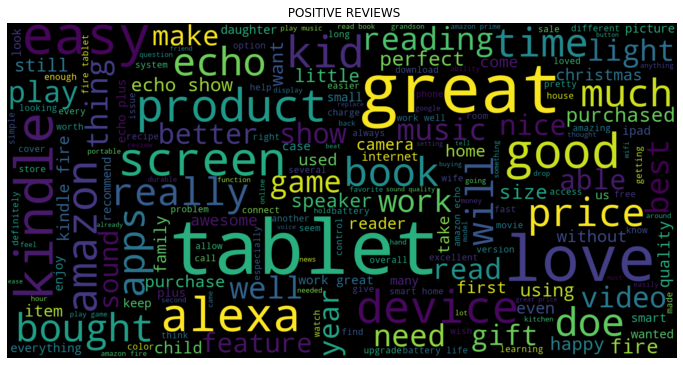

In [36]:
wordcloud = WordCloud(width=1600, height=800, random_state=21, max_font_size=180).generate(pos_text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(' POSITIVE REVIEWS')
plt.show()

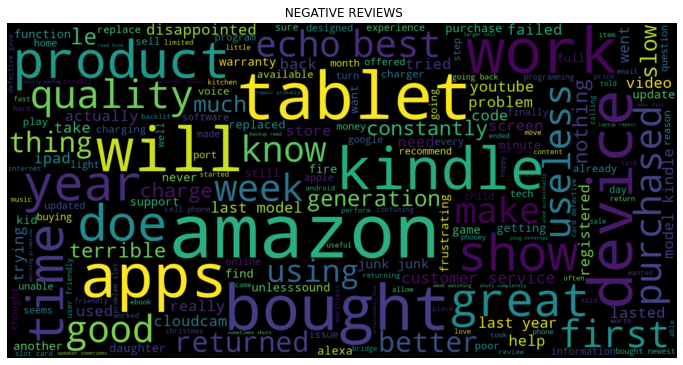

In [37]:
wordcloud = WordCloud(height=800, width=1600, random_state=21,max_font_size=180).generate(neg_text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(' NEGATIVE REVIEWS')
plt.show()

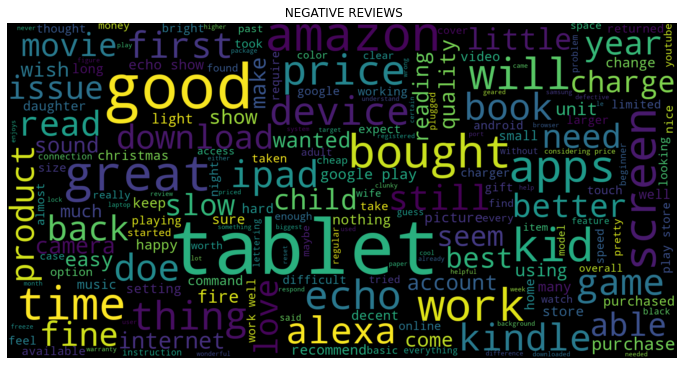

In [38]:
wordcloud = WordCloud(height=800, width=1600, random_state=21,max_font_size=180).generate(neu_text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(' NEGATIVE REVIEWS')
plt.show()

In [39]:
le_senti = LabelEncoder()
train_data['sentiment'] = le_senti.fit_transform(train_data['sentiment'])
test_val_data['sentiment'] = le_senti.fit_transform(test_val_data['sentiment'])

# Tf-idf vectorization

In [40]:
tvec1= TfidfVectorizer()
tvec2= TfidfVectorizer()
tvec3= TfidfVectorizer()

In [44]:
train1 = train_data.reset_index()
combi1 = train1.append(test_val_data, ignore_index=True, sort=False)
tvec1.fit(combi1['reviews.text'])
tvec1_text1_train = pd.DataFrame(tvec1.transform(train1['reviews.text']).toarray())
tvec1_text2_val = pd.DataFrame(tvec1.transform(test_val_data['reviews.text']).toarray())

In [45]:
tvec1_text1_train

,0,1,2,3,4,5,6,7,8,9,...,4398,4399,4400,4401,4402,4403,4404,4405,4406,4407
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3937,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3938,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3940,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
tvec2.fit(combi1['reviews.title'])
tvec2_title1_train = pd.DataFrame(tvec2.transform(train1['reviews.title']).toarray())
tvec2_title2_val = pd.DataFrame(tvec2.transform(test_val_data['reviews.title']).toarray())
tvec2_title2_val

,0,1,2,3,4,5,6,7,8,9,...,1114,1115,1116,1117,1118,1119,1120,1121,1122,1123
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
Train1 = pd.concat([train1.drop(['reviews.text','reviews.title','sentiment','index'],axis=1),tvec1_text1_train, tvec2_title1_train],axis=1)
Test_Val1 = pd.concat([test_val_data.drop(['reviews.text','reviews.title','sentiment'],axis=1),tvec1_text2_val, tvec2_title2_val],axis=1)
Train1

,name,categories,primaryCategories,reviews_day,reviews_month,reviews_year,0,1,2,3,...,1114,1115,1116,1117,1118,1119,1120,1121,1122,1123
0,2,10,0,26,12,2016,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5,1,1,17,1,2018,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9,2,1,20,12,2017,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,14,22,3,4,8,2017,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13,9,0,23,1,2017,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3937,5,1,1,8,12,2017,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3938,11,7,0,31,3,2017,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3939,12,0,0,19,1,2017,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3940,13,9,0,27,5,2016,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
x_train1=Train1.values
y_train1=train_data['sentiment'].values
x_val1=Test_Val1.values
y_val1 = test_val_data['sentiment'].values

In [58]:
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction import text

punc = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"%"]
stop_words = text.ENGLISH_STOP_WORDS.union(punc)

stemmer = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'[a-zA-Z\']+')

def tokenize(text):
    return [stemmer.stem(word) for word in tokenizer.tokenize(text.lower())]
tvec3 = TfidfVectorizer(stop_words = stop_words, tokenizer = tokenize, max_features = 1000)
reviews=tvec3.fit_transform(combi1['reviews.text'])
words = tvec3.get_feature_names()

C:\Users\nitin\.conda\envs\tf\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  warnings.warn(
C:\Users\nitin\.conda\envs\tf\lib\site-packages\sklearn\utils

In [61]:
words

['abil',
 'abl',
 'absolut',
 'access',
 'accessori',
 'accident',
 'account',
 'activ',
 'actual',
 'ad',
 'adapt',
 'add',
 'addit',
 'adjust',
 'adult',
 'advanc',
 'advantag',
 'advertis',
 'afford',
 'age',
 'ahead',
 'alarm',
 'alexa',
 'allow',
 'alon',
 'alot',
 'alreadi',
 'altern',
 'alway',
 'amaz',
 'amazon',
 'android',
 'angl',
 'annoy',
 'anoth',
 'answer',
 'anybodi',
 'anymor',
 'anyon',
 'anyth',
 'anytim',
 'anywher',
 'app',
 'appear',
 'appl',
 'applic',
 'appreci',
 'appropri',
 'area',
 'arlo',
 'arriv',
 'asid',
 'ask',
 'aspect',
 'assist',
 'associ',
 'audibl',
 'audio',
 'auto',
 'autom',
 'automat',
 'avail',
 'averag',
 'avid',
 'awar',
 'away',
 'awesom',
 'awhil',
 'babi',
 'background',
 'backlight',
 'backlit',
 'backup',
 'bargain',
 'base',
 'basi',
 'basic',
 'bass',
 'batteri',
 'beat',
 'beauti',
 'becaus',
 'becom',
 'bedroom',
 'befor',
 'begin',
 'beginn',
 'believ',
 'bell',
 'benefit',
 'besid',
 'best',
 'bestbuy',
 'better',
 'bigger',
 'big

# Multinomial Naive Bayes

In [62]:
nb = MultinomialNB()
nb.fit(Train1.values, train1['sentiment'])
y_pred= nb.predict(Test_Val1.values)
y_val = test_val_data['sentiment']

In [63]:
print(confusion_matrix(y_true=y_val, y_pred=y_pred))
print(classification_report(y_true=y_val, y_pred=y_pred))
print(accuracy_score(y_val, y_pred)*100)

[[  0   0  24]
 [  0   0  39]
 [  0   0 937]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.00      0.00      0.00        39
           2       0.94      1.00      0.97       937

    accuracy                           0.94      1000
   macro avg       0.31      0.33      0.32      1000
weighted avg       0.88      0.94      0.91      1000

93.7


C:\Users\nitin\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nitin\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nitin\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Solving Class Inbalance problem

In [64]:
train_data.sentiment.value_counts()

2    3694
1     158
0      90
Name: sentiment, dtype: int64

In [70]:
count_2, count_1, count_0 =train_data.sentiment.value_counts()
class_2 = train_data[train_data.sentiment==2]
class_1 = train_data[train_data.sentiment==1]
class_0 = train_data[train_data.sentiment==0]

In [71]:
#now to overcome the class imbalance proble there are two ways
#1: UnderSampling
#2: OverSampling

# UnderSampling

In [74]:
class_2_under = class_2.sample(count_1)
train_under= pd.concat([class_2_under,class_1,class_0],axis=0)
print(train_under.shape)
print(train_under.sentiment.value_counts())

(406, 9)
1    158
2    158
0     90
Name: sentiment, dtype: int64


# OverSampling

In [75]:
class_0_over = class_0.sample(count_2,replace=True)
class_1_over = class_1.sample(count_2,replace=True)
train_over = pd.concat([class_2,class_0_over,class_1_over],axis=0)
print(train_over.shape)
print(train_over.sentiment.value_counts())

(11082, 9)
0    3694
1    3694
2    3694
Name: sentiment, dtype: int64


In [77]:
lr= LogisticRegression(C=30, class_weight='balanced', solver='sag', 
                         multi_class='multinomial', n_jobs=6, random_state=40, 
                         verbose=1, max_iter=1000)

In [80]:
#Tfidf for undersampled data
train = train_under.reset_index(drop=True) 
combi = train.append(test_val_data , ignore_index=True)
print(combi.shape)

tvec1.fit(combi['reviews.text'])
tvec_text1 = pd.DataFrame(tvec1.transform(train['reviews.text']).toarray())
tvec_text2 = pd.DataFrame(tvec1.transform(test_val_data['reviews.text']).toarray())

tvec2.fit(combi['reviews.title'])
tvec_title1 = pd.DataFrame(tvec2.transform(train['reviews.title']).toarray())
tvec_title2 = pd.DataFrame(tvec2.transform(test_val_data['reviews.title']).toarray())

Train = pd.concat([train.drop(['reviews.text','reviews.title','sentiment'],axis=1),tvec_text1, tvec_title1],axis=1)
Test_Val = pd.concat([test_val_data.drop(['reviews.text','reviews.title','sentiment'],axis=1),tvec_text2, tvec_title2],axis=1)
x_train=Train.values
y_train=train['sentiment']
x_val=Test_Val.values
y_val = test_val_data['sentiment']

(1406, 9)


In [81]:
#Logistic Regression for undersampled data
lr.fit(x_train,y_train)
y_pred = lr.predict(x_val)
print(confusion_matrix(y_true=y_val, y_pred=y_pred))
print(classification_report(y_true=y_val, y_pred=y_pred))
print('accuracy : ',accuracy_score(y_val, y_pred)*100)

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.


max_iter reached after 18 seconds
[[  9   5  10]
 [  8  12  19]
 [236 262 439]]
              precision    recall  f1-score   support

           0       0.04      0.38      0.06        24
           1       0.04      0.31      0.08        39
           2       0.94      0.47      0.62       937

    accuracy                           0.46      1000
   macro avg       0.34      0.38      0.26      1000
weighted avg       0.88      0.46      0.59      1000

accuracy :  46.0


C:\Users\nitin\.conda\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=6)]: Done   1 out of   1 | elapsed:   17.9s finished


0.5059234758766498


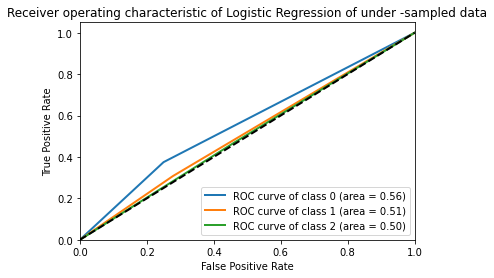

In [82]:
lb = LabelBinarizer()
lb.fit(y_val)
y_val1 = lb.transform(y_val)
y_pred1 = lb.transform(y_pred)
print(roc_auc_score(y_val1, y_pred1, average='weighted'))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_val1[:, i], y_pred1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
lw=2
for i in range(3):
    plt.plot(fpr[i], tpr[i], lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of Logistic Regression of under -sampled data')
plt.legend(loc="lower right")
plt.show()

In [83]:
#TFIDF Vectorizer for over-sampled data
train = train_over.reset_index(drop=True) 

tvec1.fit(train['reviews.text'])
tvec_text1 = pd.DataFrame(tvec1.transform(train['reviews.text']).toarray())
tvec_text2 = pd.DataFrame(tvec1.transform(test_val_data['reviews.text']).toarray())

tvec2.fit(train['reviews.title'])
tvec_title1 = pd.DataFrame(tvec2.transform(train['reviews.title']).toarray())
tvec_title2 = pd.DataFrame(tvec2.transform(test_val_data['reviews.title']).toarray())

Train = pd.concat([train.drop(['reviews.text','reviews.title','sentiment'],axis=1),tvec_text1, tvec_title1],axis=1)
Test_Val = pd.concat([test_val_data.drop(['reviews.text','reviews.title','sentiment'],axis=1),tvec_text2, tvec_title2],axis=1)

Train.to_csv('Train.csv',encoding='utf-8')
Test_Val.to_csv('Test_Val.csv',encoding='utf-8')

x_train=Train.values
y_train=train['sentiment'].values
x_val=Test_Val.values
y_val = test_val_data['sentiment'].values

In [84]:
#logistic Regression for over-sampled data
lr.fit(x_train,y_train)
y_pred = lr.predict(x_val)
print(confusion_matrix(y_true=y_val, y_pred=y_pred))
print(classification_report(y_true=y_val, y_pred=y_pred))
print('accuracy : ',accuracy_score(y_val, y_pred)*100)

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.


max_iter reached after 709 seconds
[[ 12   4   8]
 [ 12   9  18]
 [183 187 567]]
              precision    recall  f1-score   support

           0       0.06      0.50      0.10        24
           1       0.04      0.23      0.08        39
           2       0.96      0.61      0.74       937

    accuracy                           0.59      1000
   macro avg       0.35      0.45      0.31      1000
weighted avg       0.90      0.59      0.70      1000

accuracy :  58.8


C:\Users\nitin\.conda\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=6)]: Done   1 out of   1 | elapsed: 11.8min finished


0.5943776023029832


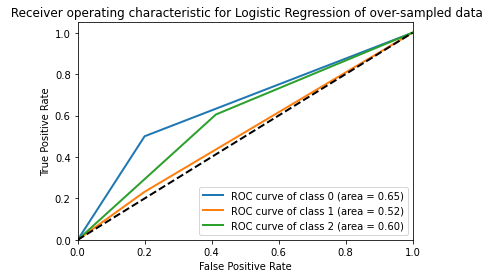

In [85]:
lb = LabelBinarizer()
lb.fit(y_val)
y_val1 = lb.transform(y_val)
y_pred1 = lb.transform(y_pred)
print(roc_auc_score(y_val1, y_pred1, average='weighted'))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_val1[:, i], y_pred1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
lw=2
for i in range(3):
    plt.plot(fpr[i], tpr[i], lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' Receiver operating characteristic for Logistic Regression of over-sampled data')
plt.legend(loc="lower right")
plt.show()

In [87]:
#Multinomial Naive Bayes
nb = MultinomialNB()
nb.fit(x_train,y_train)
y_pred = nb.predict(x_val)
print(confusion_matrix(y_true=y_val, y_pred=y_pred))
print(classification_report(y_true=y_val, y_pred=y_pred))
print(accuracy_score(y_val, y_pred)*100)
print(nb.score(x_train,y_train))
print(nb.score(x_val,y_val))

[[ 13   2   9]
 [  3  13  23]
 [  9  95 833]]
              precision    recall  f1-score   support

           0       0.52      0.54      0.53        24
           1       0.12      0.33      0.17        39
           2       0.96      0.89      0.92       937

    accuracy                           0.86      1000
   macro avg       0.53      0.59      0.54      1000
weighted avg       0.92      0.86      0.89      1000

85.9
0.9477531131564699
0.859


0.6894159428212925


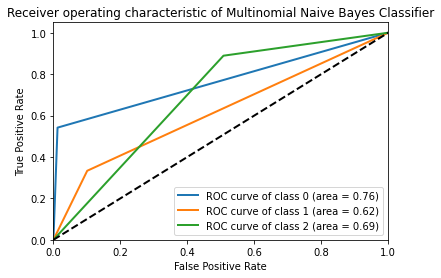

In [88]:
lb = LabelBinarizer()
lb.fit(y_val)
y_val1 = lb.transform(y_val)
y_pred1 = lb.transform(y_pred)
print(roc_auc_score(y_val1, y_pred1, average='weighted'))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_val1[:, i], y_pred1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
lw=2
for i in range(3):
    plt.plot(fpr[i], tpr[i], lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of Multinomial Naive Bayes Classifier')
plt.legend(loc="lower right")
plt.show()

In [89]:
#Random forest classifier
rf= RandomForestClassifier(n_estimators=400,random_state=10).fit(x_train,y_train)
y_pred=rf.predict(x_val)
print(confusion_matrix(y_true=y_val, y_pred=y_pred))
print(classification_report(y_true=y_val, y_pred=y_pred))
print('accuracy : ',accuracy_score(y_val, y_pred)*100)
print(rf.score(x_train,y_train))
print(rf.score(x_val,y_val))

[[  7   0  17]
 [  0  10  29]
 [  0   0 937]]
              precision    recall  f1-score   support

           0       1.00      0.29      0.45        24
           1       1.00      0.26      0.41        39
           2       0.95      1.00      0.98       937

    accuracy                           0.95      1000
   macro avg       0.98      0.52      0.61      1000
weighted avg       0.96      0.95      0.94      1000

accuracy :  95.39999999999999
1.0
0.954


0.6349206349206349


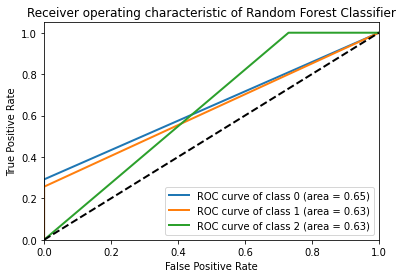

In [90]:
lb = LabelBinarizer()
lb.fit(y_val)
y_val1 = lb.transform(y_val)
y_pred1 = lb.transform(y_pred)
print(roc_auc_score(y_val1, y_pred1, average='weighted'))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_val1[:, i], y_pred1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
lw=2
for i in range(3):
    plt.plot(fpr[i], tpr[i], lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of Random Forest Classifier')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#XGB classifier
xgb= XGBClassifier(n_estimators=1000,max_depth=6).fit(x_train,y_train)
y_pred=xgb.predict(x_val)
print(confusion_matrix(y_true=y_val, y_pred=y_pred))
print(classification_report(y_true=y_val, y_pred=y_pred))
print("accuracy : ",accuracy_score(y_val, y_pred)*100)

C:\Users\nitin\.conda\envs\tf\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:48:44] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [ ]:
lb = LabelBinarizer()
lb.fit(y_val)
y_val1 = lb.transform(y_val)
y_pred1 = lb.transform(y_pred)
print(roc_auc_score(y_val1, y_pred1, average='weighted'))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_val1[:, i], y_pred1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
lw=2
for i in range(3):
    plt.plot(fpr[i], tpr[i], lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of XGBClassifier')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#multi class SVM
svc = SVC(kernel='linear', class_weight='balanced', C=1.0, random_state=0).fit(x_train, y_train) 
y_pred=svc.predict(x_val)
print(confusion_matrix(y_true=y_val, y_pred=y_pred))
print(classification_report(y_true=y_val, y_pred=y_pred))
print("accuracy : ",accuracy_score(y_val, y_pred)*100)

In [ ]:
lb = LabelBinarizer()
lb.fit(y_val)
y_val1 = lb.transform(y_val)
y_pred1 = lb.transform(y_pred)
print(roc_auc_score(y_val1, y_pred1, average='weighted'))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_val1[:, i], y_pred1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
lw=2
for i in range(3):
    plt.plot(fpr[i], tpr[i], lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of multiclass SVM Classifier')
plt.legend(loc="lower right")
plt.show()